# Drill-down thorugh agg table to source table with transactions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dateutil

## Creation of source table

In [2]:
df_source = pd.DataFrame({
    "Timestamp":[pd.Timestamp(2021, 1, 1, 10), pd.Timestamp(2021, 1, 1, 11), pd.Timestamp(2021, 1, 1, 12),
                pd.Timestamp(2021, 1, 2, 10), pd.Timestamp(2021, 1, 2, 11), pd.Timestamp(2021, 1, 2, 12),
                pd.Timestamp(2021, 1, 3, 10), pd.Timestamp(2021, 1, 3, 11), pd.Timestamp(2021, 1, 3, 12)],
    "Transaction_ID": [791, 792, 793, 891, 892, 893, 991, 992, 993],
    "Dim_1": [11, 11, 11, 12, 12, 12, 13, 13, 13],
    "Dim_2": [1, 1, 1, 2, 2, 2, 1, 1, 1],
    "Dim_3": [7, 7, 7, 7, 7, 7, 8, 8, 8],
    "Metric_1": [1011, 1011, 1011, 1012, 1012, 1012, 1013, 1013, 1013],
    "Metric_2": [0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.1, 0.1, 0.1]
})

In [3]:
df_source

,Timestamp,Transaction_ID,Dim_1,Dim_2,Dim_3,Metric_1,Metric_2
0,2021-01-01 10:00:00,791,11,1,7,1011,0.1
1,2021-01-01 11:00:00,792,11,1,7,1011,0.1
2,2021-01-01 12:00:00,793,11,1,7,1011,0.1
3,2021-01-02 10:00:00,891,12,2,7,1012,0.2
4,2021-01-02 11:00:00,892,12,2,7,1012,0.2
5,2021-01-02 12:00:00,893,12,2,7,1012,0.2
6,2021-01-03 10:00:00,991,13,1,8,1013,0.1
7,2021-01-03 11:00:00,992,13,1,8,1013,0.1
8,2021-01-03 12:00:00,993,13,1,8,1013,0.1


In [4]:
# df_source.columns = ["Timestamp", "Transaction_ID", "Dim_1", "Dim_2", "Dim_2", "Metric_1", "Metric_2"]

## Creation of agg table

In [5]:
df_agg = df_source

In [6]:
df_agg = df_agg.drop(["Timestamp", "Transaction_ID"], axis='columns') # remove origin column and Transaction_ID

In [7]:
df_agg["Timestamp_day"] = df_source['Timestamp'].dt.date # add new column, aggregated per day

In [8]:
df_agg.set_index("Timestamp_day", inplace=True)

In [9]:
df_agg

,Dim_1,Dim_2,Dim_3,Metric_1,Metric_2
Timestamp_day,,,,,
2021-01-01,11,1,7,1011,0.1
2021-01-01,11,1,7,1011,0.1
2021-01-01,11,1,7,1011,0.1
2021-01-02,12,2,7,1012,0.2
2021-01-02,12,2,7,1012,0.2
2021-01-02,12,2,7,1012,0.2
2021-01-03,13,1,8,1013,0.1
2021-01-03,13,1,8,1013,0.1
2021-01-03,13,1,8,1013,0.1


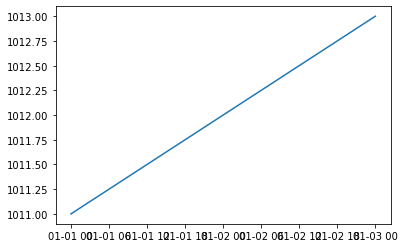

In [10]:
plt.plot(df_agg.index, df_agg["Metric_1"])

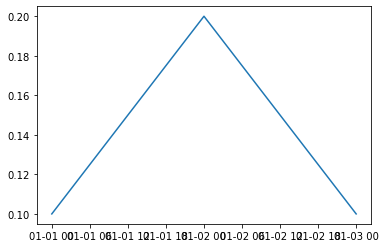

In [11]:
plt.plot(df_agg.index, df_agg["Metric_2"])

In [12]:
df_source

,Timestamp,Transaction_ID,Dim_1,Dim_2,Dim_3,Metric_1,Metric_2
0,2021-01-01 10:00:00,791,11,1,7,1011,0.1
1,2021-01-01 11:00:00,792,11,1,7,1011,0.1
2,2021-01-01 12:00:00,793,11,1,7,1011,0.1
3,2021-01-02 10:00:00,891,12,2,7,1012,0.2
4,2021-01-02 11:00:00,892,12,2,7,1012,0.2
5,2021-01-02 12:00:00,893,12,2,7,1012,0.2
6,2021-01-03 10:00:00,991,13,1,8,1013,0.1
7,2021-01-03 11:00:00,992,13,1,8,1013,0.1
8,2021-01-03 12:00:00,993,13,1,8,1013,0.1


In [15]:
df_agg = df_agg.groupby(["Timestamp_day", "Dim_1", "Dim_2", "Dim_3"]).sum(["Metric_1", "Metric_2"])

In [16]:
df_agg

,,,,Metric_1,Metric_2
Timestamp_day,Dim_1,Dim_2,Dim_3,,
2021-01-01,11,1,7,3033,0.3
2021-01-02,12,2,7,3036,0.6
2021-01-03,13,1,8,3039,0.3


## Reading from source table using parameter-value from agg table

In [17]:
df_source[(df_source["Timestamp"] > pd.Timestamp(2021, 1, 1)) & (df_source["Timestamp"] < pd.Timestamp(2021, 1, 1+1)) & (df_source["Dim_3"] == 7)]

,Timestamp,Transaction_ID,Dim_1,Dim_2,Dim_3,Metric_1,Metric_2
0,2021-01-01 10:00:00,791,11,1,7,1011,0.1
1,2021-01-01 11:00:00,792,11,1,7,1011,0.1
2,2021-01-01 12:00:00,793,11,1,7,1011,0.1
